In [12]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime


In [13]:

# Step 1: Fetch weather data from NWS API for Rocky Mountain National Park
def fetch_weather_data():
    api_url = 'https://api.weather.gov/gridpoints/BOU/41,69/forecast'
    response = requests.get(api_url)
    response.raise_for_status()  # Raises an exception for any HTTP errors
    return response.json()

# Step 2: Parse weather data and convert it into a DataFrame
def parse_weather_data(data):
    forecast = data['properties']['periods']
    df = pd.DataFrame(forecast)
    df['timestamp'] = pd.to_datetime(df['startTime'])
    df = df[['timestamp', 'temperature', 'windSpeed', 'shortForecast']]  # Extract relevant columns
    df['precipitation'] = 0  # Placeholder for precipitation if needed (API provides limited data)
    return df

# Step 3: Append new data to a CSV file (or create it if it doesn’t exist)
def append_weather_data_to_csv(df, file_path):
    try:
        # Check if the file exists. If so, append without writing headers.
        existing_data = pd.read_csv(file_path)
        combined_df = pd.concat([existing_data, df]).drop_duplicates(subset='timestamp', keep='last')
        combined_df.to_csv(file_path, index=False)
    except FileNotFoundError:
        # If the file doesn't exist, create a new one.
        df.to_csv(file_path, index=False)
    print(f"Weather data has been saved to {file_path}")

# Step 4: Function to plot ice-related weather conditions
def plot_weather_data(file_path):
    # Load the stored weather data from the CSV file
    df = pd.read_csv(file_path)
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    
    # Plot temperature over time
    plt.figure(figsize=(10, 6))
    plt.plot(df['timestamp'], df['temperature'], label='Temperature (°F)', color='blue')
    plt.xlabel('Date and Time')
    plt.ylabel('Temperature (°F)')
    plt.title('Temperature Trends in RMNP')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot wind speed over time
    plt.figure(figsize=(10, 6))
    plt.plot(df['timestamp'], df['windSpeed'], label='Wind Speed (mph)', color='green')
    plt.xlabel('Date and Time')
    plt.ylabel('Wind Speed (mph)')
    plt.title('Wind Speed Trends in RMNP')
    plt.legend()
    plt.grid(True)
    plt.show()


Weather data has been saved to /Users/thowe/Documents/Personal Code/rmnp_weather_data.csv


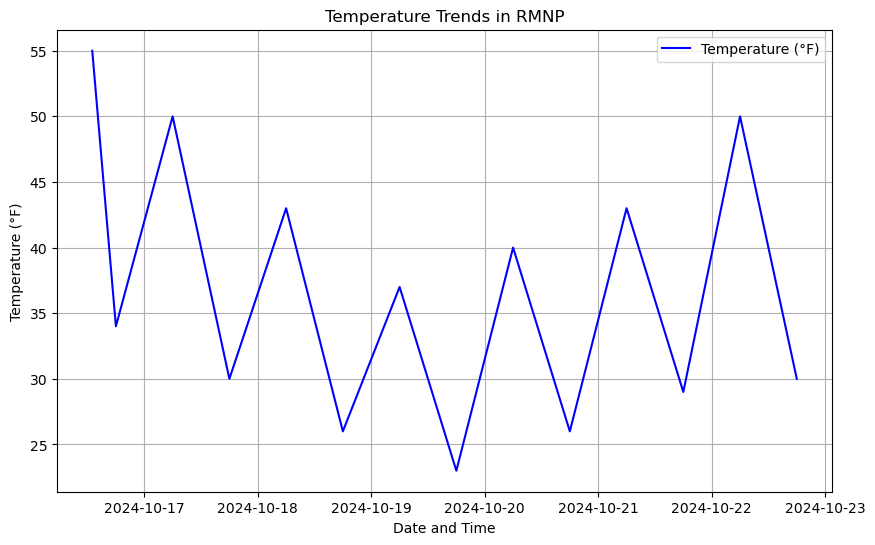

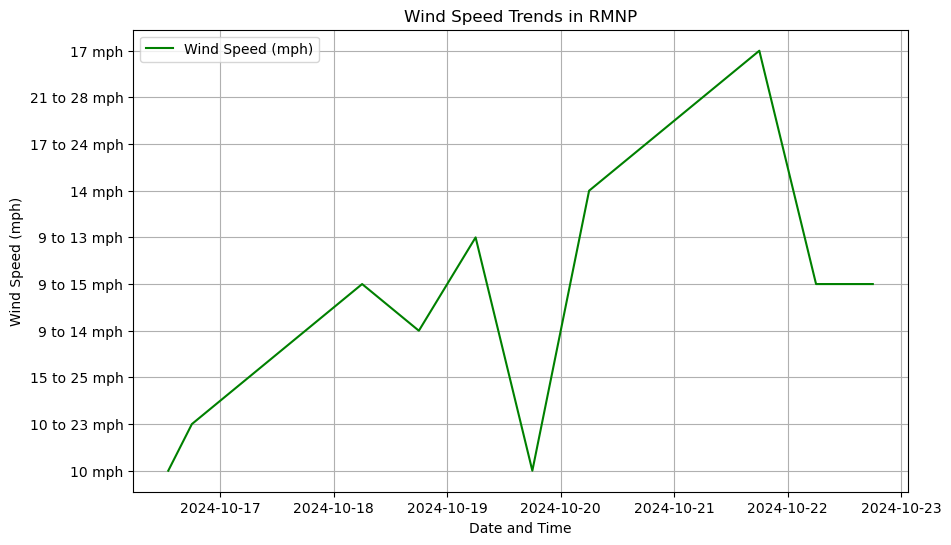

In [14]:

# Step 5: Main function to fetch data and store it
def main(file_path):
    # Fetch and parse weather data
    weather_data = fetch_weather_data()
    weather_df = parse_weather_data(weather_data)
    
    # Append the weather data to the CSV file
    append_weather_data_to_csv(weather_df, file_path)

# If running the script directly, provide the path to the CSV file
if __name__ == "__main__":
    csv_file_path = '/Users/thowe/Documents/Personal Code/rmnp_weather_data.csv'  # Path to store weather data
    main(csv_file_path)  # Fetch and store data
    plot_weather_data(csv_file_path)  # View plots of the stored data